# Project: TMDB Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>  I have selected <b>The Movie Database(TMDB)</b> that contains data of around 10,000 movies including their votes, release date, score of popularity, budget, revenue and runtime.

With this dataset, we can ask following questions:
- Most popular movies from year to year.
- Movies with higher ratings from year to year.
- Which genres are most popular from year to year? (based on profit).
- What are the properties associated with profitable movies?
- Movies having longest and shortest runtime.
- Best Month to Release a Movie.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

<a id='wrangling'></a>
## Data Wrangling

### Gathering

In [72]:
df = pd.read_csv(r'C:\Users\Kami\Downloads\tmdb-movies.csv') #gathering the data, aka data acquisition

### Assessing

<ul>
   <li><strong>Printing few lines of data</strong></li>
</ul>

In [73]:
df.head()
df.tail(50)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10816,16378,tt0077147,0.064602,0,0,The Rutles: All You Need Is Cash,Eric Idle|John Halsey|Ricky Fataar|Neil Innes|...,NaN,Eric Idle|Gary Weis,NaN,...,The story of the rise and fall of the Pre-Fab ...,76,Comedy,NaN,3/22/78,14,6.0,1978,0.000000e+00,0.000000e+00
10817,13963,tt0077838,0.064029,0,321952,The Last Waltz,Robbie Robertson|Rick Danko|Levon Helm|Richard...,http://www.mgm.com/#/our-titles/1092/The-Last-...,Martin Scorsese,It Started as a Concert. It Became a Celebration.,...,Martin Scorsese's rockumentary intertwines foo...,117,Documentary|Music,FM Productions|Last Waltz Inc.,5/1/78,33,8.0,1978,0.000000e+00,1.076189e+06
10818,39995,tt0079482,0.047645,0,0,Long Weekend,John Hargreaves|Briony Behets|Mike McEwen|Roy ...,NaN,Colin Eggleston,Their crime was against nature. Nature found t...,...,When a suburban couple go camping for the week...,92,Horror|Thriller|Mystery,The Australian Film Commission|Victorian Film|...,10/14/78,17,6.1,1978,0.000000e+00,0.000000e+00
10819,16214,tt0077696,0.044675,0,78000000,Hooper,Burt Reynolds|Robert Klein|Adam West|Jan-Micha...,http://en.wikipedia.org/wiki/Hooper_(film),Hal Needham,The greatest stuntman alive!,...,Burt Reynolds plays a legendary stunt man know...,107,Action|Comedy,Warner Bros.,7/28/78,13,6.0,1978,0.000000e+00,2.607307e+08
10820,13377,tt0060345,1.227582,315000,0,How the Grinch Stole Christmas!,Boris Karloff|June Foray|Thurl Ravenscroft|Dal...,NaN,Chuck Jones|Ben Washam,"You're a mean one, Mr. Grinch",...,"Bitter and hateful, the Grinch is irritated at...",26,Animation|Family|Comedy,MGM Television|The Cat in the Hat Productions,12/18/66,286,7.1,1966,2.116175e+06,0.000000e+00
10821,1714,tt0060390,0.929393,0,0,Fahrenheit 451,Oskar Werner|Julie Christie|Cyril Cusack|Bee D...,NaN,FranÃ§ois Truffaut,Aflame with the excitement and emotions of tom...,...,"In the future, an oppressive government mainta...",112,Drama|Science Fiction,Anglo Enterprises|Vineyard Film Ltd.,9/6/66,93,6.8,1966,0.000000e+00,0.000000e+00
10822,396,tt0061184,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,NaN,Mike Nichols,You are cordially invited to George and Martha...,...,Mike Nicholsâ€™ film from Edward Albee's play ...,131,Drama,Chenault Productions,6/21/66,74,7.5,1966,5.038511e+07,2.266436e+08
10823,3591,tt0060782,0.613444,0,0,One Million Years B.C.,Raquel Welch|John Richardson|Percy Herbert|Rob...,NaN,Don Chaffey,Travel back through time and space to the edge...,...,As the Earth wrestles with its agonising birth...,100,Action|Adventure|Fantasy,Hammer Film Productions,12/30/66,17,5.6,1966,0.000000e+00,0.000000e+00
10824,2525,tt0060164,0.533292,18000000,0,The Bible: In the Beginning...,Michael Parks|Ulla Bergryd|Richard Harris|Fran...,NaN,John Huston,The unforgettable adventure of Man from the Cr...,...,Extravagant production of the first part of th...,174,Drama,Seven Arts Productions|Dino de Laurentiis Cine...,9/28/66,18,5.8,1966,1.209243e+08,0.000000e+00
10825,1052,tt0060176,0.509263,0,0,Blow-Up,David Hemmings|Vanessa Redgrave|Sarah Miles|Jo...,NaN,Michelangelo Antonioni,Michelangelo Antonioni's first British film,...,A successful mod photographer in London whose ...,111,Drama|Mystery|Thriller,Bridge Films|Metro-Goldwyn-Mayer (MGM)|Carlo P...,12/18/66,103,6.8,1966,0.000000e+00,0.000000e+00


<ul>
<li><strong>Number of rows in data</strong></li>
<li><strong>Number of columns in data</strong></li>
</ul>    

In [74]:
num_rows , num_cols = df.shape
print("Number of rows = {}, Number of Columns = {}".format(num_rows,num_cols))

Number of rows = 10866, Number of Columns = 21


 <ul> <li><strong>Duplicate rows in data</strong></li> </ul>

In [75]:
print('Number of duplicated row = ', df.duplicated().sum()) #we have one duplicated row.
#let's see duplicated row
duplicate_row_id = df [ df.duplicated() ].id.iloc[0]  #extracting duplicate row id.
print ('Duplicate row ID = ', duplicate_row_id)
df [ df.id == duplicate_row_id ] #taking look at duplicated rows.

Number of duplicated row =  1
Duplicate row ID =  42194


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


<i>Issue No 1: Need to drop duplicated row.</i>

<ul><li><strong>Datatypes of each column</strong></li></ul>

In [76]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

<i>Issue No 2: Change datatype of release_date from strings to datetime. </i>

 <ul><li><strong>Looking for missing values in each column</strong></li></ul>

In [77]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

<i>Issue No 3: Need to address missing values for following columns </i><br/>['imdb_id','cast','homepage','director','tagline','keywords','overview','genres','production_companies']

<li><b>Non null unique values in each column<b/></li>

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

  <li><b>identifying rows with missing data<b/></li>

In [79]:
df[ df.isnull().any(axis=1) ]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
18,150689,tt1661199,5.556818,95000000,542351353,Cinderella,Lily James|Cate Blanchett|Richard Madden|Helen...,NaN,Kenneth Branagh,Midnight is just the beginning.,...,"When her father unexpectedly passes away, youn...",112,Romance|Fantasy|Family|Drama,Walt Disney Pictures|Genre Films|Beagle Pug Fi...,3/12/15,1495,6.8,2015,8.739996e+07,4.989630e+08
21,307081,tt1798684,5.337064,30000000,91709827,Southpaw,Jake Gyllenhaal|Rachel McAdams|Forest Whitaker...,NaN,Antoine Fuqua,Believe in Hope.,...,"Billy ""The Great"" Hope, the reigning junior mi...",123,Action|Drama,Escape Artists|Riche-Ludwig Productions,6/15/15,1386,7.3,2015,2.759999e+07,8.437300e+07
26,214756,tt2637276,4.564549,68000000,215863606,Ted 2,Mark Wahlberg|Seth MacFarlane|Amanda Seyfried|...,NaN,Seth MacFarlane,"Ted is Coming, Again.",...,Newlywed couple Ted and Tami-Lynn want to have...,115,Comedy,Universal Pictures|Media Rights Capital|Fuzzy ...,6/25/15,1666,6.3,2015,6.255997e+07,1.985944e+08
32,254470,tt2848292,3.877764,29000000,287506194,Pitch Perfect 2,Anna Kendrick|Rebel Wilson|Hailee Steinfeld|Br...,NaN,Elizabeth Banks,We're back pitches,...,"The Bellas are back, and they are better than ...",115,Comedy|Music,Universal Pictures|Gold Circle Films|Brownston...,5/7/15,1264,6.8,2015,2.667999e+07,2.645056e+08
33,296098,tt3682448,3.648210,40000000,162610473,Bridge of Spies,Tom Hanks|Mark Rylance|Amy Ryan|Alan Alda|Seba...,NaN,Steven Spielberg,"In the shadow of war, one man showed the world...",...,"During the Cold War, the Soviet Union captures...",141,Thriller|Drama,DreamWorks SKG|Amblin Entertainment|Studio Bab...,10/15/15,1638,7.1,2015,3.679998e+07,1.496016e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


- Notice we have 8874 rows with missing data

### Cleaning

<i>Issue No 1: Need to drop duplicated row.</i><br/>
<i>Issue No 2: Change datatype of release_date from strings to datetime. </i><br/>
<i>Issue No 3: Need to address missing values for following columns </i><br/>['imdb_id','cast','homepage','director','tagline','keywords','overview','genres','production_companies']

<b>Solving Issue No 1: Need to drop duplicated row.</b>

In [80]:
df_clean = df.copy() #making copy so that original data set remains intact.
df_clean.drop_duplicates(inplace=True)

In [81]:
df_clean.duplicated().sum() #verifying that there should be now 0 duplicates.
df_clean.shape #Also notice , number of rows are now 10865 instead of 10866. So our Issue No 1 is resolved successfully.

(10865, 21)

<b>Solving Issue No 2: Change datatype of release_date from strings to datetime.</b>

In [82]:
df_clean['release_date'] = pd.to_datetime(df_clean['release_date'])

In [83]:
print(df_clean.dtypes['release_date']) #verifying datetime conversion.
df_clean.tail(-10700)[['release_date','release_year']] 

datetime64[ns]


,release_date,release_year
10701,2065-08-06,1965
10702,2065-10-15,1965
10703,2065-06-22,1965
10704,2065-06-23,1965
10705,2065-04-01,1965
...,...,...
10861,2066-06-15,1966
10862,2066-12-21,1966
10863,2066-01-01,1966
10864,2066-11-02,1966


It seems like above conversion converted datatype to date time but there are some problems. Years like 1966,1965 are converted into 2066 and 2065 respectively, which is obviously not good enough. So we need to fix this somehow.

In [84]:
from datetime import datetime
df_clean[ df_clean['release_date'] >  datetime.today() ].shape #So we have total 362 rows with wrong year information.

(362, 21)

In [85]:
#Now we will extract unique future years and type cast them as a list.
years_to_be_changed = list (df_clean[ df_clean['release_date'] >  datetime.today() ]['release_date'].dt.year.unique())

In [86]:
def change_year (date):
    if date.year in years_to_be_changed:
        #print(date)
        #print(date.year)
        date =  datetime.strftime(date,'%Y-%m-%d')
        date= date.replace('20','19')
        date = datetime.strptime(date,'%Y-%m-%d')
    return date
     
        
    
df_clean['release_date'] = df_clean['release_date'].apply(change_year) #applying function change_year to release_date column.


In [87]:
df_clean.tail(20)[['release_date','release_year']]
df_clean[ df_clean['release_date'] >  datetime.today() ]
#So now we don't have any rows with future dates,It means Issue No 2 is resolved successfully.

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


<b>Solving Issue No 3: Need to address missing values for following columns </b><br/>['imdb_id','cast','homepage','director','tagline','keywords','overview','genres','production_companies']

In [88]:
null_columns_mask = df_clean.isnull().sum()>0 #creating null columns mask.
print (df_clean.isnull().sum()[null_columns_mask].sort_values()) #Printing names of columns with null values in ascending order.

overview                   4
imdb_id                   10
genres                    23
director                  44
cast                      76
production_companies    1030
keywords                1493
tagline                 2824
homepage                7929
dtype: int64


It looks like we don't have homepage,tagline,keywords, production_companies for many of the movies. I think deleting these columns will be a good solution as they won't be playing any significant role in terms of analyzing data.

In [89]:
df_clean.drop(['homepage','tagline','keywords','production_companies'],axis=1,inplace=True)

In [90]:
df_clean.isnull().sum()[null_columns_mask].sort_values() #now again taking look at remaining null values (in ascending order).

overview     4
imdb_id     10
genres      23
director    44
cast        76
dtype: int64

These columns can play important role in analyzing the data or trends,especially genres, director or even cast. So, deleting these won't be a good solution.<br/>
This time I would opt for deleting rows with missing values.

In [91]:
df_clean[df_clean.isna().any(axis=1)].shape
df_clean.dropna(inplace=True)
df_clean.shape

(10724, 17)

In [92]:
df_clean.isnull().sum().sum() #Verifying if there any null value exists in any of the column. Since, it returns 0, means
#there are no more null or missing values left. It means our Issue No 3 is also resolved now. We are good to go for EDA.

0

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Most popular movies from year to year.

- we can answer this question by finding max popularity score for movie in each year.

step 1: find max popularity score for each release_year.


In [93]:
popularity_score_year_wise =  list(df_clean.groupby(['release_year'])['popularity'].max())
df_popular_score_year_wise =  df_clean[df_clean.popularity.isin(popularity_score_year_wise)]
#df_popular_score_year_wise[['original_title','release_year','popularity','vote_count']]


step 2: sort by descending order of release year.

In [94]:
df_popular_score_year_wise.sort_values('release_year',ascending=False,inplace=True)
#df_popular_score_year_wise[['original_title','release_year','popularity','vote_count']]

C:\Users\Kami\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


step 3: extract movie title and release year to be used as x axis labels.

In [95]:
xlabels = [] 
for i,j in df_popular_score_year_wise[['original_title','release_year']].iterrows():
       # print (j['original_title'],j['release_year'])
        xlabels.append(j['original_title'] + ' ' + str(j['release_year']))
#xlabels

step 4: extract popularity score to be plotted on y axis.

In [96]:
y_score = []
for i,j in df_popular_score_year_wise[['popularity']].iterrows():
    #print (j['popularity'])
    y_score.append(j['popularity'])
#y_score    

step 5: finally plotting bar char to see graphically which movie was popular in each year along with its popularity score.

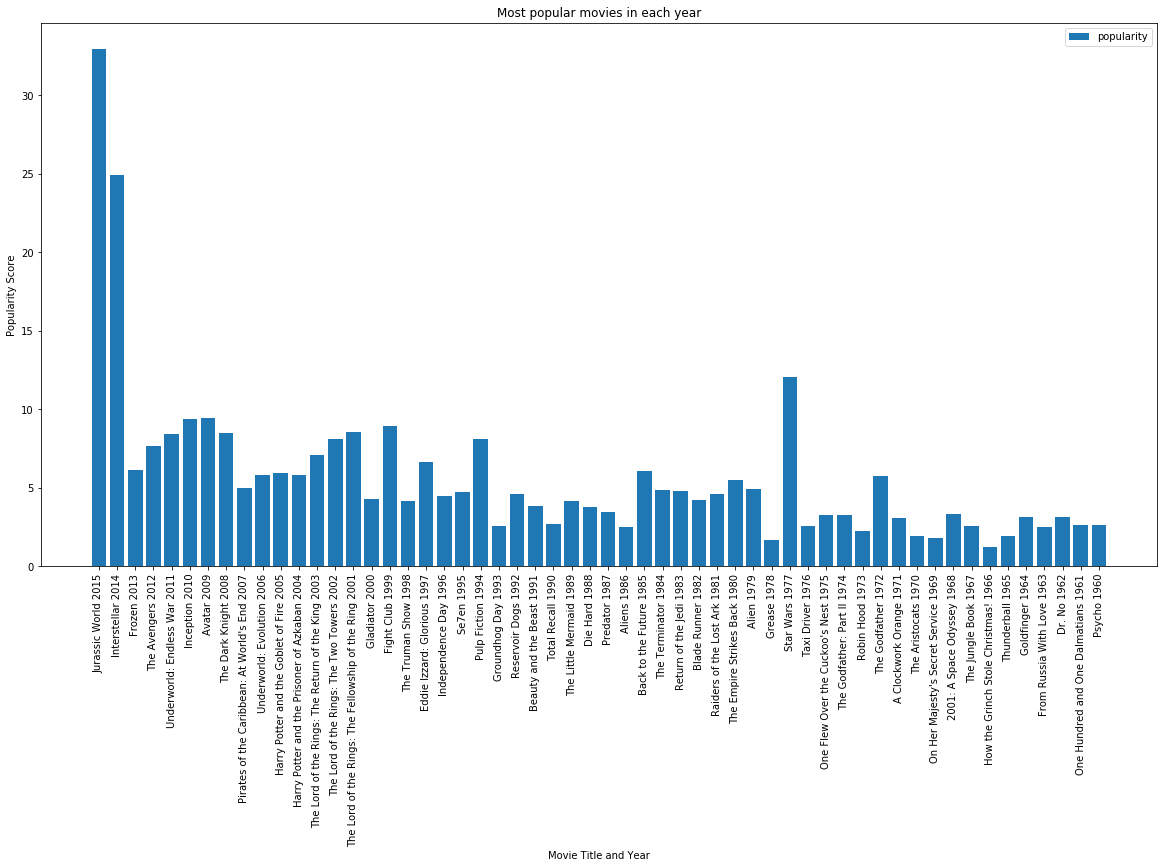

In [97]:
plt.subplots(figsize=(20,10))
plt.bar(x=xlabels,height=y_score,label='popularity')
plt.xticks(rotation=90);
plt.xlabel('Movie Title and Year')
plt.ylabel('Popularity Score')
plt.title("Most popular movies in each year")
plt.legend();

- For movies released in year 2015, most popular movie was <i> "Jurasic World"</i> while <i>"Psycho"</i> received more popularity among movies released in 1960.

### Research Question 2: Movies with higher ratings from year to year.

- we can answer this question by calculating the max vote_average and grouping it by release_year.

step 1: first we will find movies with max average rating in each year.

In [65]:
vote_year_wise = dict (df_clean.groupby(['release_year'])['vote_average'].max())
cols_list = list(df_clean.columns)
df_vote_average = pd.DataFrame(columns=cols_list) #creating empty dataframe to store year wise movies with max vote_average.

for key,value in vote_year_wise.items():
    #print (df_clean[(df_clean.release_year == key) & (df_clean.vote_average == value)])
    #print("\n\n")
    df_vote_average = df_vote_average.append(df_clean[(df_clean.release_year == key) & (df_clean.vote_average == value)])   

step 2: extract movie title and release year to be used as x axis labels.

In [66]:
df_vote_average.sort_values('release_year',ascending=False,inplace=True)
xlabels = [] 
for i,j in df_vote_average[['original_title','release_year']].iterrows():
       # print (j['original_title'],j['release_year'])
        xlabels.append(j['original_title'] + ' ' + str(j['release_year']))
#xlabels

step 3: extract vote_average to be plotted on y axis.

In [67]:
y_score = []
for i,j in df_vote_average[['vote_average']].iterrows():
    #print (j['popularity'])
    y_score.append(j['vote_average'])
#y_score 

step 4: finally plotting bar char to see graphically which movie received highest average votes in each year.

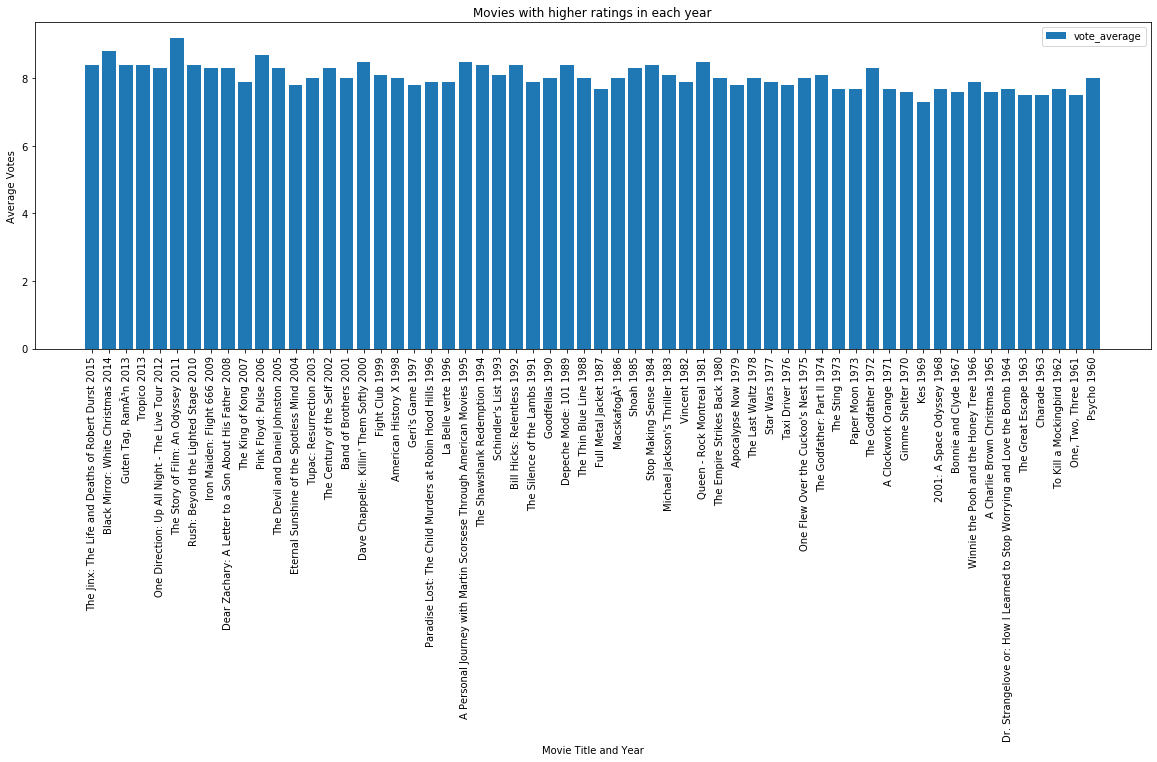

In [68]:
plt.subplots(figsize=(20,6))
plt.bar(x=xlabels,height=y_score,label='vote_average')
plt.xticks(rotation=90);
plt.xlabel('Movie Title and Year')
plt.ylabel('Average Votes')
plt.title("Movies with higher ratings in each year")
plt.legend();

- Among movies that were released in year 2015, the movie which received highest vote average was <i> "the jinx life and death of robert durst"</i> while <i>"Psycho"</i> received highest vote average among movies released in 1960.

### Research Question 3:  Which genres are most popular from year to year? (based on profit)

- To answer this question, we can find which genres contribute most to the profitable movie in each year.

step 1: Calculating profit for each movie.

In [36]:
df_clean.insert(5,'profit',df_clean.revenue-df_clean.budget) #calculating profit of each movie.


step 2: Taking profitable movies into account.

In [37]:
df_profitable_movies =  df_clean[(df_clean.profit > 0) & (df_clean.budget > 0)] #Taking only profitable movies in every year.
df_profitable_movies.shape

(2776, 18)

step 3: Now we will plot bar chart for each year separately to visualize which genres was most popular in profitable movies in each year.

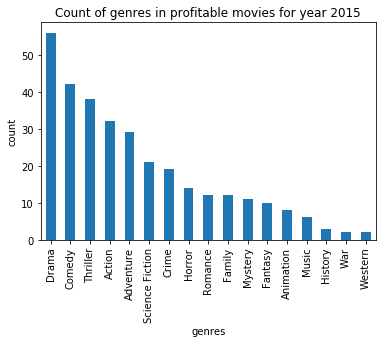

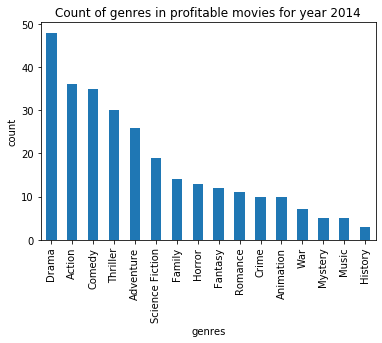

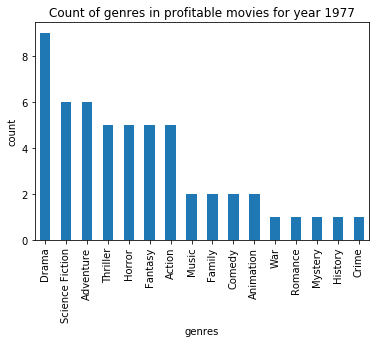

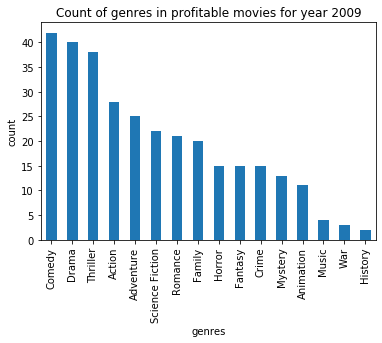

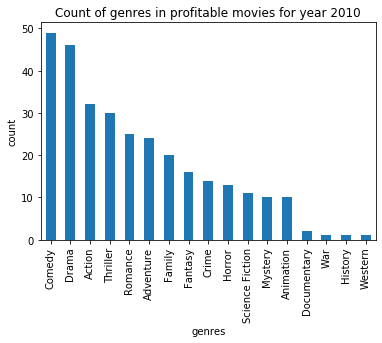

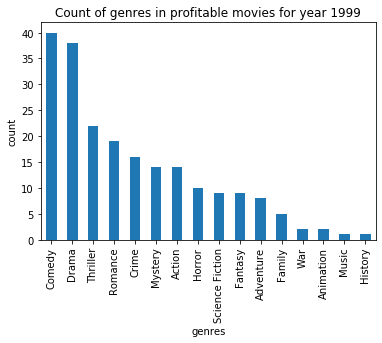

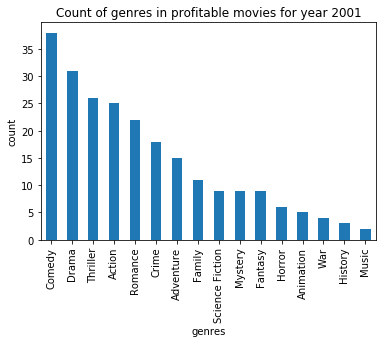

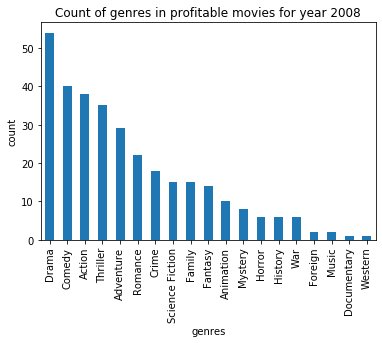

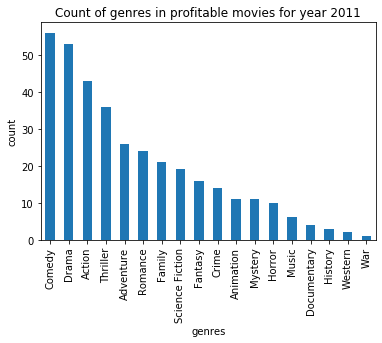

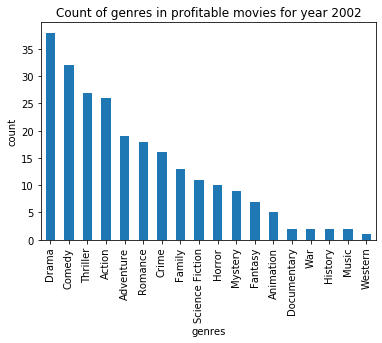

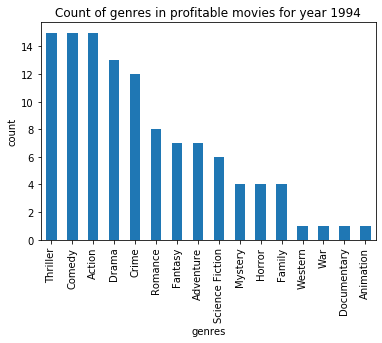

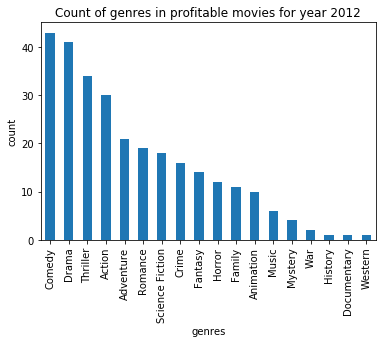

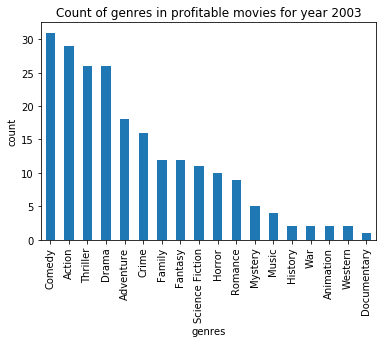

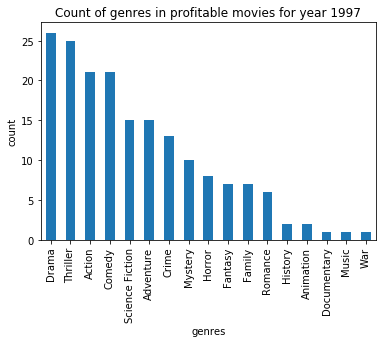

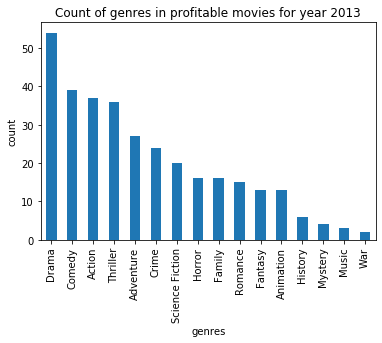

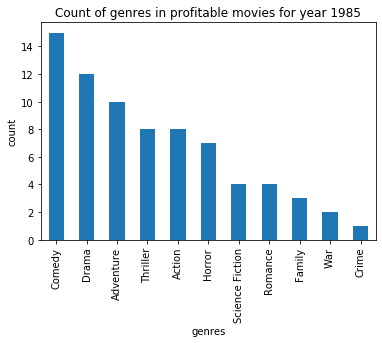

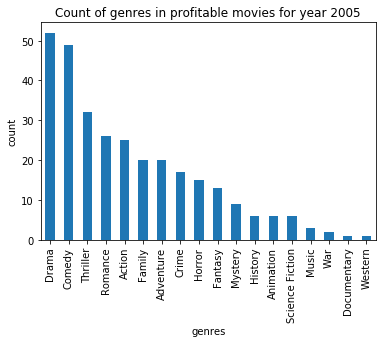

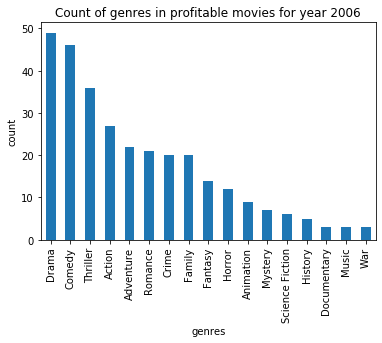

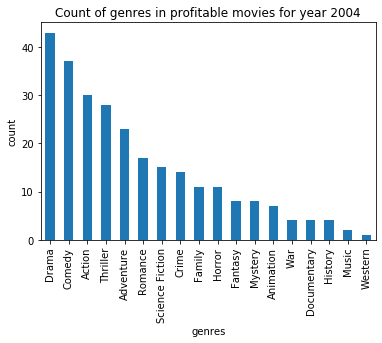

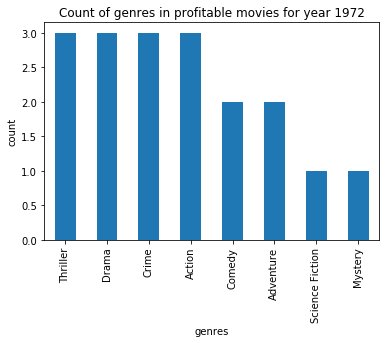

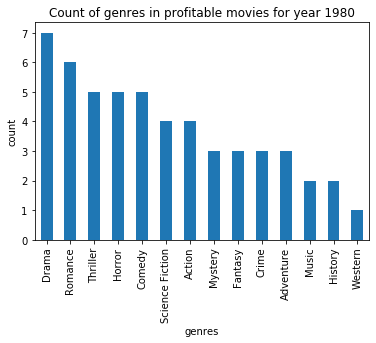

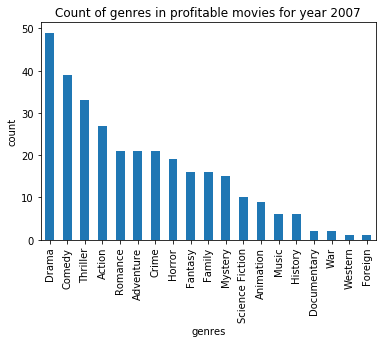

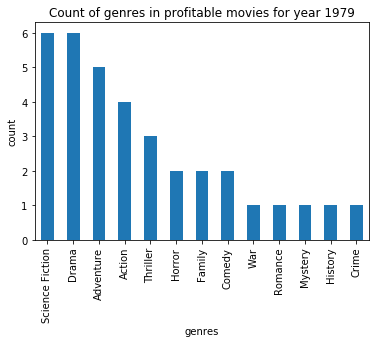

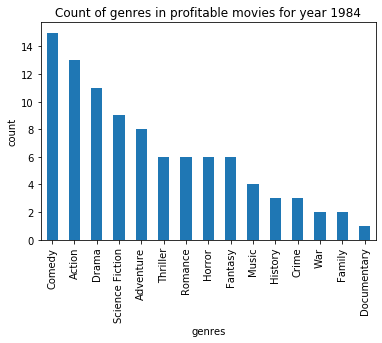

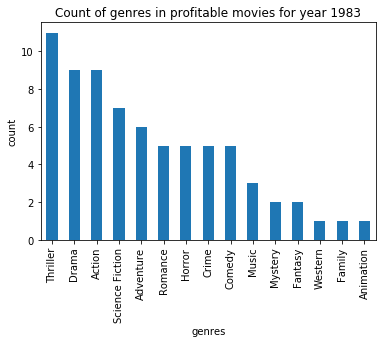

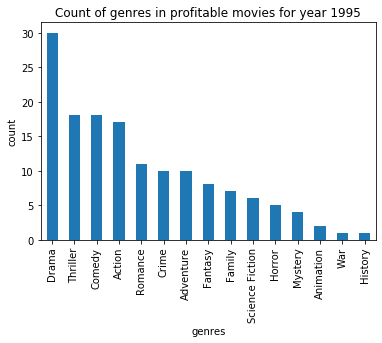

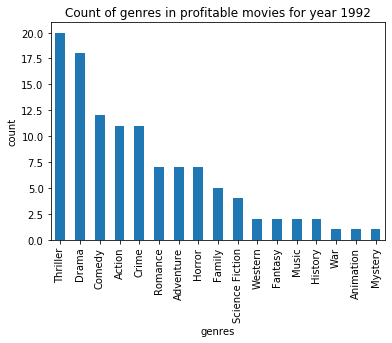

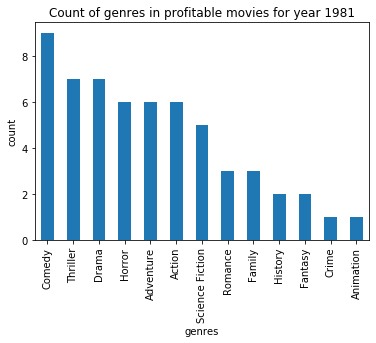

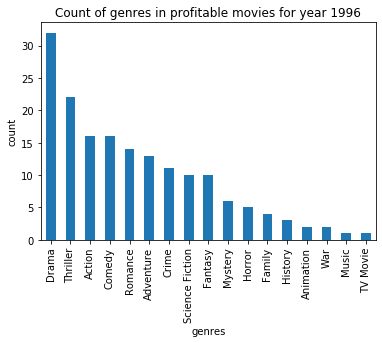

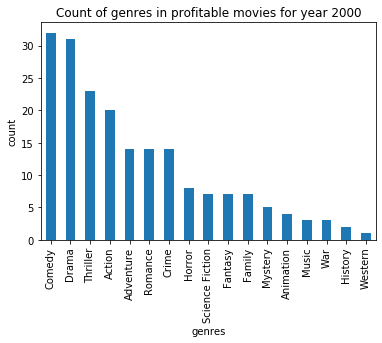

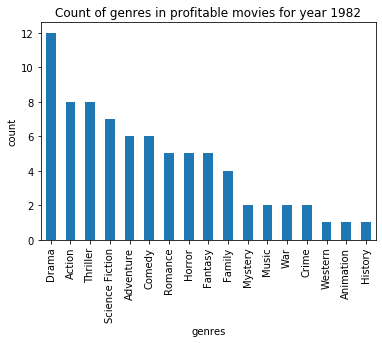

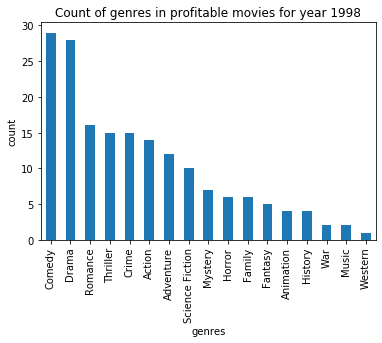

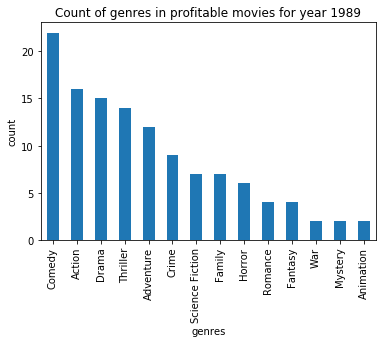

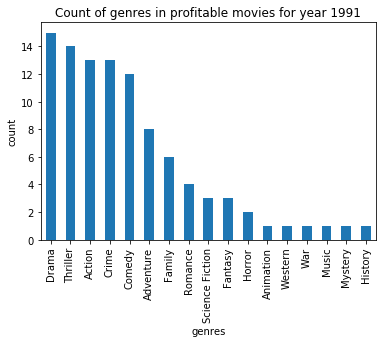

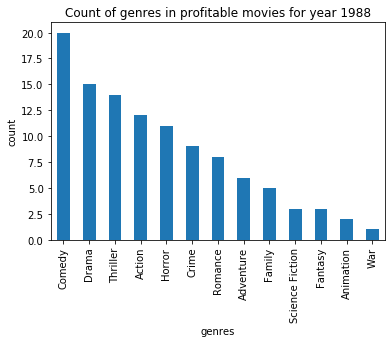

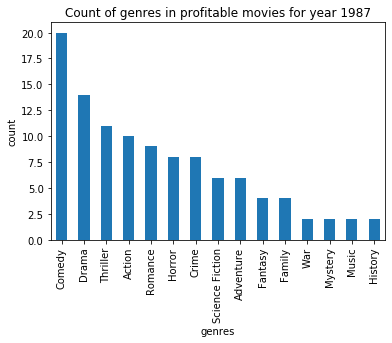

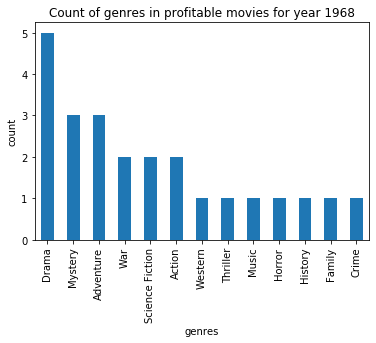

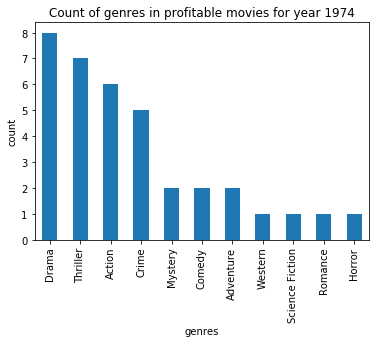

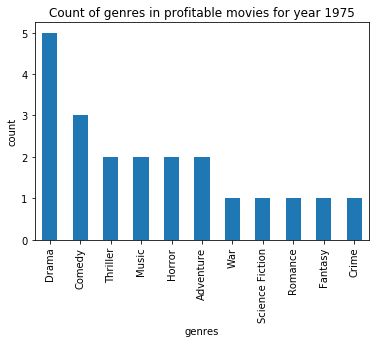

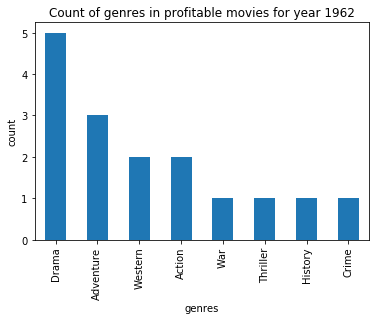

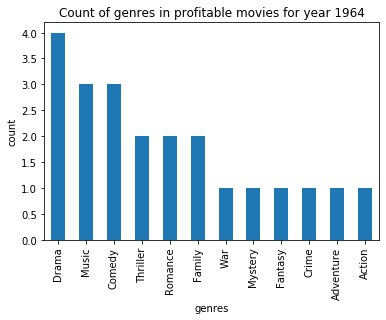

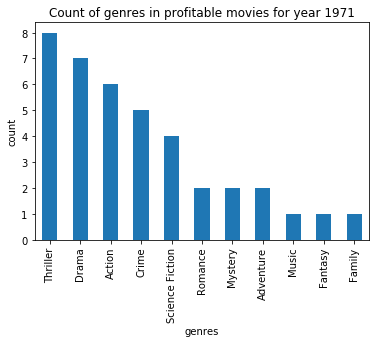

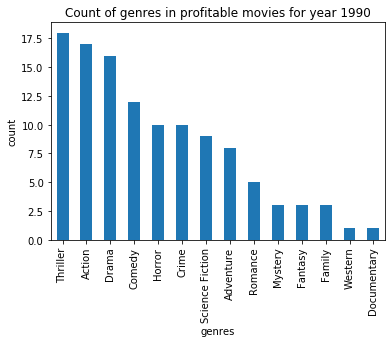

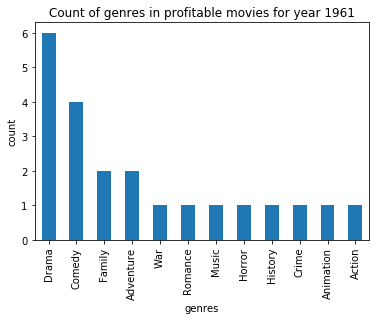

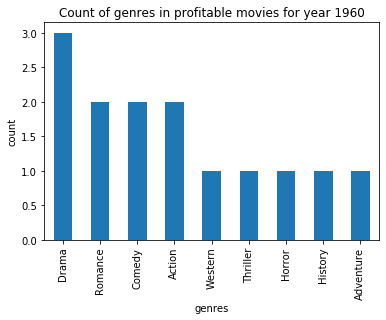

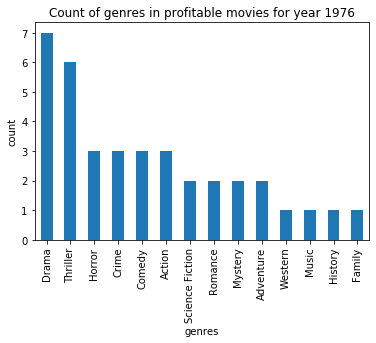

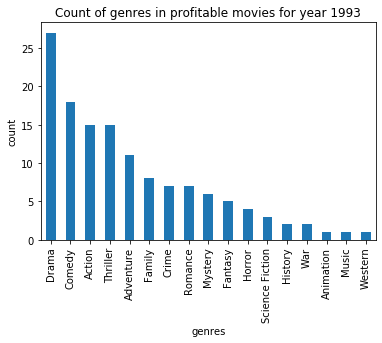

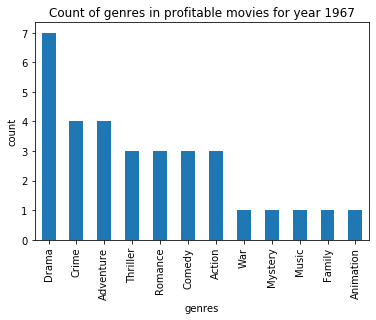

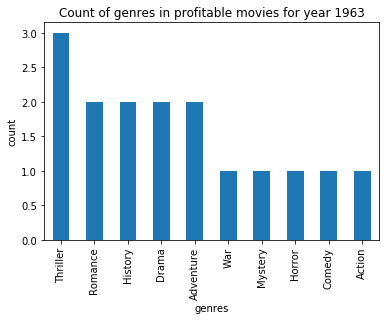

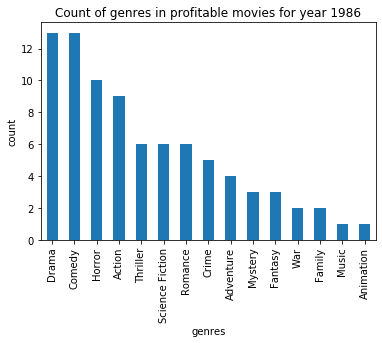

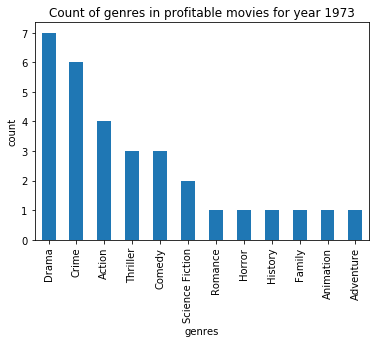

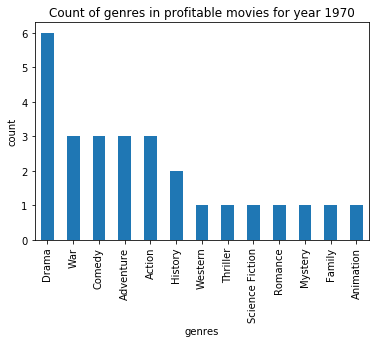

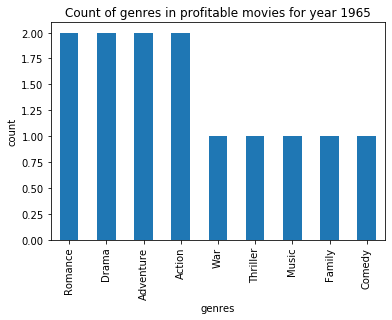

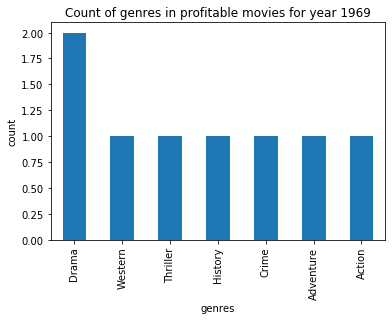

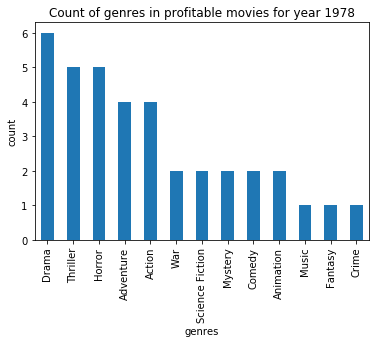

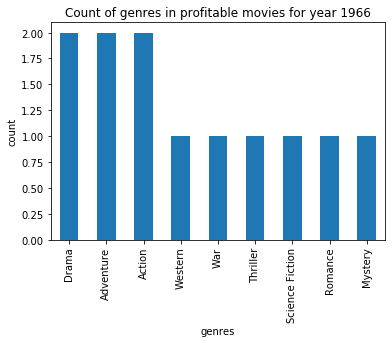

In [38]:
release_years = list (df_profitable_movies['release_year'].unique())

genres_dict = {}
for year in release_years:
    df_genres = df_profitable_movies[df_profitable_movies.release_year == year ]
    dummies_genres = df_genres.genres.str.get_dummies('|')
    dummies_genres.sum().sort_values(ascending=False).plot(kind='bar');
    plt.xlabel('genres')
    plt.ylabel('count')
    plt.title('Count of genres in profitable movies for year {}'.format(year))
    plt.show()
    print("\n\n\n")

step 4: Now we will plot combined bar chart for all genres used in profitable movies in every year.

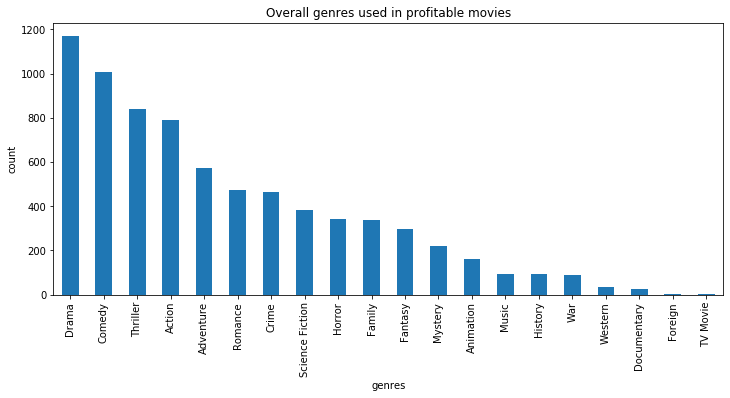

In [40]:
df_profitable_movies['genres'].str.get_dummies(sep='|').sum().sort_values(ascending=False).plot(kind='bar',figsize=(12,5));
plt.xlabel('genres');
plt.ylabel('count');
plt.title('Overall genres used in profitable movies');

- We can see clearly, Most of the profitable movies are based on the genre Drama followed by Comedy, Thriller and Action.

### Research Question 4:  What are the properties associated with profitable movies?

step 1: Let's analyze correlation between profit and other features.

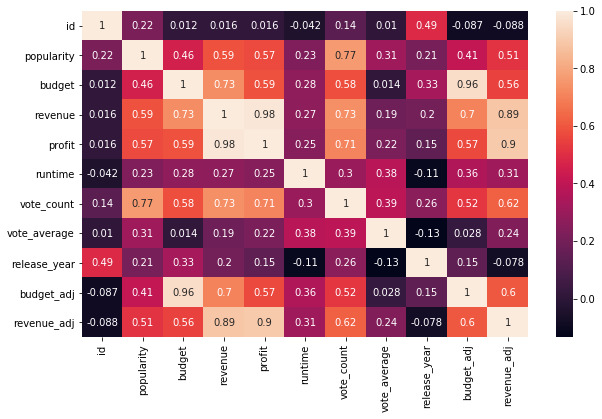

In [566]:
plt.subplots(figsize=(10,6))
sn.heatmap(df_profitable_movies.corr(),annot=True); #plotting heatmap to visualize graphically.

- By plotting heatmap, we can clearly see there is a positive correlation of profit with features like runtime, budget and popularity.

step 2: Let's analyze each of them one by one.

> - profit vs runtime

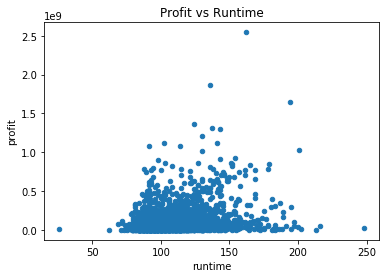

In [41]:
df_profitable_movies[['profit','runtime']].plot(kind='scatter',x='runtime',y='profit'); #plotting scatter plot
plt.title('Profit vs Runtime');

- Most of the profitable movies have runtime greater than 50 mins but less than 200 mins. Only few movies are having runtime greater than 200 mins while only 1 movie having runtime less than 50 mins.

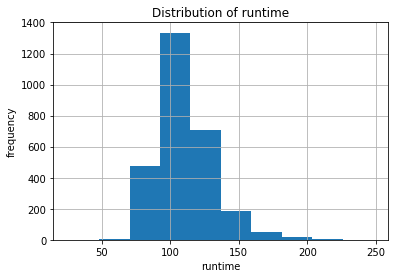

In [42]:
df_profitable_movies['runtime'].hist();
plt.xlabel('runtime');
plt.ylabel('frequency');
plt.title('Distribution of runtime');

- Most of the durations of profitable movies lie between 90 to 150 mins. Distribution is right or positive skewed.

In [569]:
df_profitable_movies.runtime.mean()

110.16750720461096

Average duration of profitable movie is 110 mins i.e. around (2 hours).

> - profit vs budget

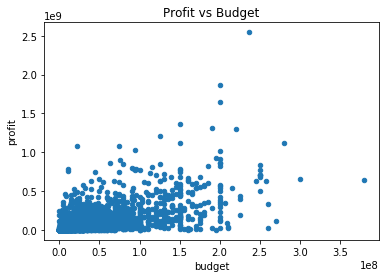

In [43]:
df_profitable_movies.plot(kind='scatter',x='budget',y='profit'); #plotting scatter plot
plt.title('Profit vs Budget');

- Most of the movies are with budget range under 200,000,000 (20 crore).

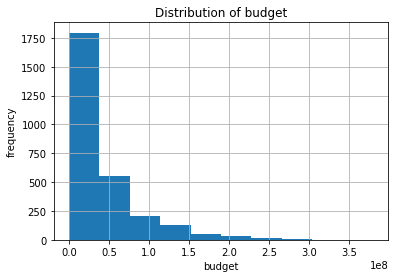

In [44]:
df_profitable_movies['budget'].hist();
plt.xlabel('budget');
plt.ylabel('frequency');
plt.title('Distribution of budget');

- Budget for most of the porfitable movies lies between 1,00,00,000 (1 crore) to 120,000,000 (12 crore).

In [572]:
df_profitable_movies.budget.mean()

40301757.668227665

Average budget for profitable movie is around 4 crore.

> - profit vs popularity

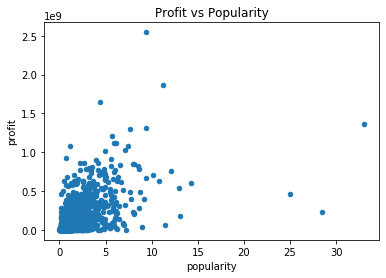

In [45]:
df_profitable_movies.plot(kind='scatter',x='popularity',y='profit'); #plotting scatter plot
plt.title('Profit vs Popularity');

- Most of the popularity scores are between 0 to 10.

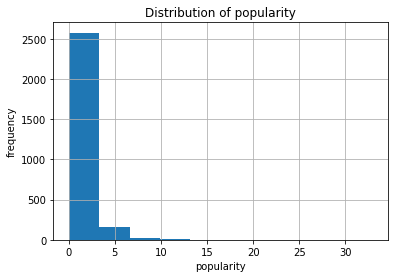

In [46]:
df_profitable_movies['popularity'].hist();
plt.xlabel('popularity');
plt.ylabel('frequency');
plt.title('Distribution of popularity');

- Now we can clearly see, popularity score for most of the profitable movies lies between 0 to 3.

In [575]:
df_profitable_movies['popularity'].mean()

1.4146774859510078

Average popularity score is 1.41.

step 3: Let's find cast associated with profitable movies.

In [48]:
profitable_movie_cast = df_profitable_movies['cast'].str.get_dummies(sep="|")

In [49]:
profitable_movie_cast.sum().sort_values(ascending=False)[:10] #Printing top 10 Artists associated with porfitable movies.

Robert De Niro       38
Tom Hanks            33
Bruce Willis         33
Tom Cruise           31
Brad Pitt            30
Samuel L. Jackson    30
Denzel Washington    29
Harrison Ford        28
Morgan Freeman       28
Cameron Diaz         27
dtype: int64

visualizing top 10 artists associated with porfitable movies.

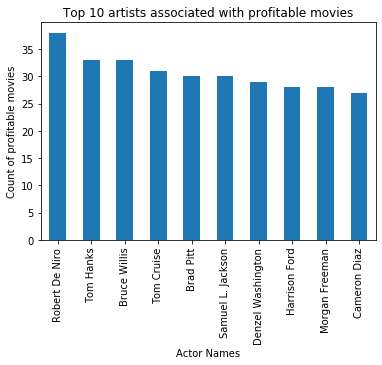

In [52]:
profitable_movie_cast.sum().sort_values(ascending=False)[:10].plot(kind='bar');
plt.xlabel('Actor Names')
plt.ylabel('Count of profitable movies')
plt.title('Top 10 artists associated with profitable movies');

- Robert De Niro is an actor having 38 profitable movies followed by Tom Hanks and Bruce Willis both with count 33.

step 4: Let's find directors associated with profitable movies.

In [55]:
profitable_movie_directors = df_profitable_movies['director'].str.get_dummies(sep="|")

In [56]:
profitable_movie_directors.sum().sort_values(ascending=False)[:10] #Printing top 10 directors associated with porfitable movies

Steven Spielberg     27
Clint Eastwood       21
Tim Burton           16
Ridley Scott         16
Robert Zemeckis      15
Robert Rodriguez     14
Martin Scorsese      14
Woody Allen          13
Steven Soderbergh    12
Ron Howard           12
dtype: int64

Visualizing top 10 directors associated with porfitable movies.

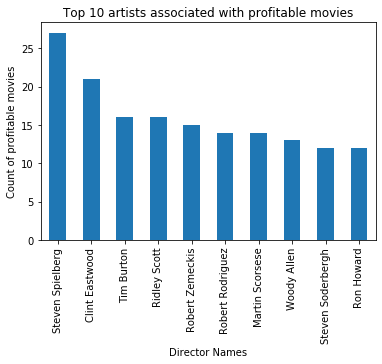

In [57]:
profitable_movie_directors.sum().sort_values(ascending=False)[:10].plot(kind='bar');
plt.xlabel('Director Names')
plt.ylabel('Count of profitable movies')
plt.title('Top 10 artists associated with profitable movies');

- So we can see, Steven Spielberg is the director having highest profitable movies count (27) while Steven Soderbergh Ron Howard share same profitable movies count i.e. 12.

### Research Question 5:  Movies having longest and shortest runtime.

step 1: First let's find movie with longest runtime.

In [582]:
df_runtime = df_clean[df_clean.runtime > 0] #since duration cannot be 0 for any movie.

In [583]:
df_runtime [df_runtime.runtime == df_runtime.runtime.max()]

,id,imdb_id,popularity,budget,revenue,profit,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,125336,tt2044056,0.006925,0,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,"The Story of Film: An Odyssey, written and dir...",900,Documentary,2011-09-03,14,9.2,2011,0.0,0.0


So the movie with longest runtime 900 mins is "The Story of Film: An Odyssey". It belongs to the Documentary genre.

step 2: Now let's find movie with shortest runtime.

In [584]:
df_runtime [df_runtime.runtime == df_runtime.runtime.min()]

,id,imdb_id,popularity,budget,revenue,profit,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1112,264170,tt3643208,0.202776,0,0,0,Batman: Strange Days,Kevin Conroy|Brian George|Tara Strong,Bruce Timm,"Celebrating Batmanâ€™s 75th anniversary, DC En...",3,Action|Animation,2014-04-09,20,7.6,2014,0.0,0.0
2232,55692,tt1791596,0.267950,0,0,0,Scrat's Continental Crack-Up,Chris Wedge|Simon Pegg,Steve Martino|Mike Thurmeier,You may think you know the history of continen...,3,Animation,2010-12-25,20,7.1,2010,0.0,0.0
2830,26840,tt0307461,0.254157,0,0,0,Shrek in the Swamp Karaoke Dance Party,Mike Myers|Eddie Murphy,Vicky Jenson|Andrew Adamson,Shrek and his friends enjoy themselves with so...,3,Animation|Comedy|Music,2001-01-01,12,5.4,2001,0.0,0.0
3298,140656,tt1315885,0.152615,0,0,0,MamÃ¡,Victoria Harris|Irma Monroig|Berta Ros,Andy Muschietti,Little Victoria is waken up by her sister Lili...,3,Horror,2008-10-07,11,6.0,2008,0.0,0.0
3350,105759,tt1430144,0.037628,0,0,0,The Black Hole,Napoleon Ryan,Philip Sansom|Olly Williams,"Charlie, a sleep-deprived office worker accide...",3,Comedy|Crime,2008-01-01,13,7.1,2008,0.0,0.0
3891,98857,tt2115386,0.028803,0,0,0,Scrat's Continental Crack-Up: Part 2,Chris Wedge,Steve Martino|Mike Thurmeier,This short film continues the adventures of th...,3,Animation|Comedy|Adventure,2011-11-16,11,6.7,2011,0.0,0.0
5399,43629,tt0411302,0.168542,0,0,0,Doodlebug,Jeremy Theobald,Christopher Nolan,A man is trying to catch some sort of bug runn...,3,Fantasy|Mystery,1997-01-01,47,6.5,1997,0.0,0.0
5993,259761,tt3605002,0.039953,0,0,0,Lights Out,Lotta Losten,David F. Sandberg,"A woman prepares for bed, but realizes that so...",3,Horror,2013-12-01,28,7.1,2013,0.0,0.0
8706,13930,tt0248808,0.811101,0,0,0,For the Birds,Ralph Eggleston,Ralph Eggleston,"One by one, a flock of small birds perches on ...",3,Animation|Comedy|Family,2000-11-01,247,7.7,2000,0.0,0.0


So we have total 9 movies with shortest runtime i.e 3 mins.

### Research Question 6:  Best Month to Release a Movie.

we can answer this question by analyzing the release date of profitable movies. 

step 1: Get release month from release date of each profitable movies

In [59]:
#adding new column release_month from release_date for each profitable movie.

df_profitable_movies.insert(13,'release_month' ,df_profitable_movies['release_date'].apply(lambda x: x.month))

step 2: Now simply get count of each month.

In [60]:
release_months = df_profitable_movies['release_month'].value_counts().sort_index()
release_months

1     148
2     176
3     207
4     192
5     223
6     281
7     253
8     237
9     262
10    240
11    223
12    334
Name: release_month, dtype: int64

step 3: Plotting bar chart to visualize graphically.

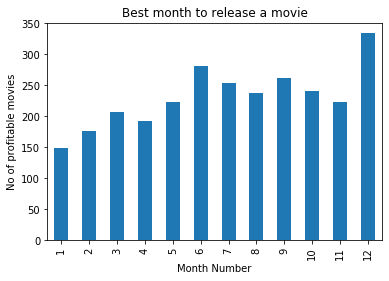

In [64]:
release_months.plot(kind='bar');
plt.xlabel('Month Number');
plt.ylabel('No of profitable movies');
plt.title('Best month to release a movie');

- So it looks like most profitable month for movies is December followed by June.

<a id='conclusions'></a>
## Conclusions
After the analysis of the given data set, we can provide information about following questions.


#### <b>Research Question 1: Most popular movies from year to year.</b>

By plotting bar chart of popular movies for each year, we can say that, for movies released in year 2015, most popular movie was <i> "Jurasic World"</i> while <i>"Psycho"</i> received more popularity among movies released in 1960.

#### Research Question 2: Movies with higher ratings from year to year.

By plotting bar chart of movies with higher rating for each year, we can say that, among movies that were released in year 2015, the movie which received highest vote average was once again <i> "the jinx life and death of robert durst"</i> while <i>"Psycho"</i> received highest vote average among movies released in 1960.

#### Research Question 3:  Which genres are most popular from year to year? (based on profit)

By looking at the chart, we can say, top 4 genres of profitable movies were <i>Drama, Comedy, Thriller and Action<i/>.

#### Research Question 4:  What are the properties associated with profitable movies?

We have concluded following properties about porfitable movies.<br/>
Most of the durations of profitable movies lie between 90 to 150 mins with average duration being 110 mins i.e. around (2 hours).<br/>
Budget for most of the porfitable movies lies between 1,00,00,000 (1 crore) to 120,000,000 (12 crore) with average budget is around 4 crore.<br/>
Popularity score for most of the profitable movies lies between 0 to 3 with average popularity score being 1.41.<br/>
Top 10 Artists associated with profitable movies are following:
>- Robert De Niro       
- Tom Hanks          
- Bruce Willis        
- Tom Cruise           
- Brad Pitt            
- Samuel L. Jackson   
- Denzel Washington    
- Harrison Ford        
- Morgan Freeman      
- Cameron Diaz      

Top 10 Directors associated with profitable movies are following:
>- Steven Spielberg     
- Clint Eastwood     
- Tim Burton         
- Ridley Scott        
- Robert Zemeckis      
- Robert Rodriguez    
- Martin Scorsese      
- Woody Allen          
- Steven Soderbergh   
- Ron Howard          

#### Research Question 5:  Movies having longest and shortest runtime.

The movie with longest runtime 900 mins is <i> "The Story of Film: An Odyssey"</i>. It belongs to the Documentary genre.

On the other hand, we have total 9 movies with shortest runtime i.e 3 mins.

#### Research Question 6:  Best Month to Release a Movie.

December followed by June are two most profitable months

#### Limitations

All the above presented analysis, insights and visualization about the data are totaly based on the information that we have gathered through the data without performing any statiscal inferences. 

For question 1 and 2, we have drawn our conclusion on the basis of popularity score and average votes respectively. Popularity score for the movie "Jurasic World" is much higher than the popularity score for other movies, So, in this situation we might have applied some statistics to discover any outliers or there might be missing data in terms of popularity score for other movies. On the other hand we can see, Average votes are almost same for all the movies.

Question 3,4 and 6 are based on the analysis of profitable movies. Again this is not 100 percent true that if we follow all properties associated with profitable movies while making a movie, then that movie also makes profit, Because in our dataset there are many movies having budget equal to 0. While analyzing the data, We have dropped all the rows where budget was 0. Movie having budget equal to 0 does not make sense at all because there is always some budget associated for movie, So, technically these are the missing values that need to filled before analyzing the data.